In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import math
from collections import Counter
from sklearn.model_selection import GridSearchCV

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data into a DataFrame
train_df = pd.read_csv('train.csv')

train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Number of rows in the Dataset
num_rows = train_df.shape[0]

num_rows

891

In [5]:
# Number of columns in the Dataset
num_columns = len(train_df.columns)

num_columns

12

In [6]:
# Display the first 5 rows

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Summary statistics

train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Visualization of Variable Distribution 

<Figure size 2000x1500 with 0 Axes>

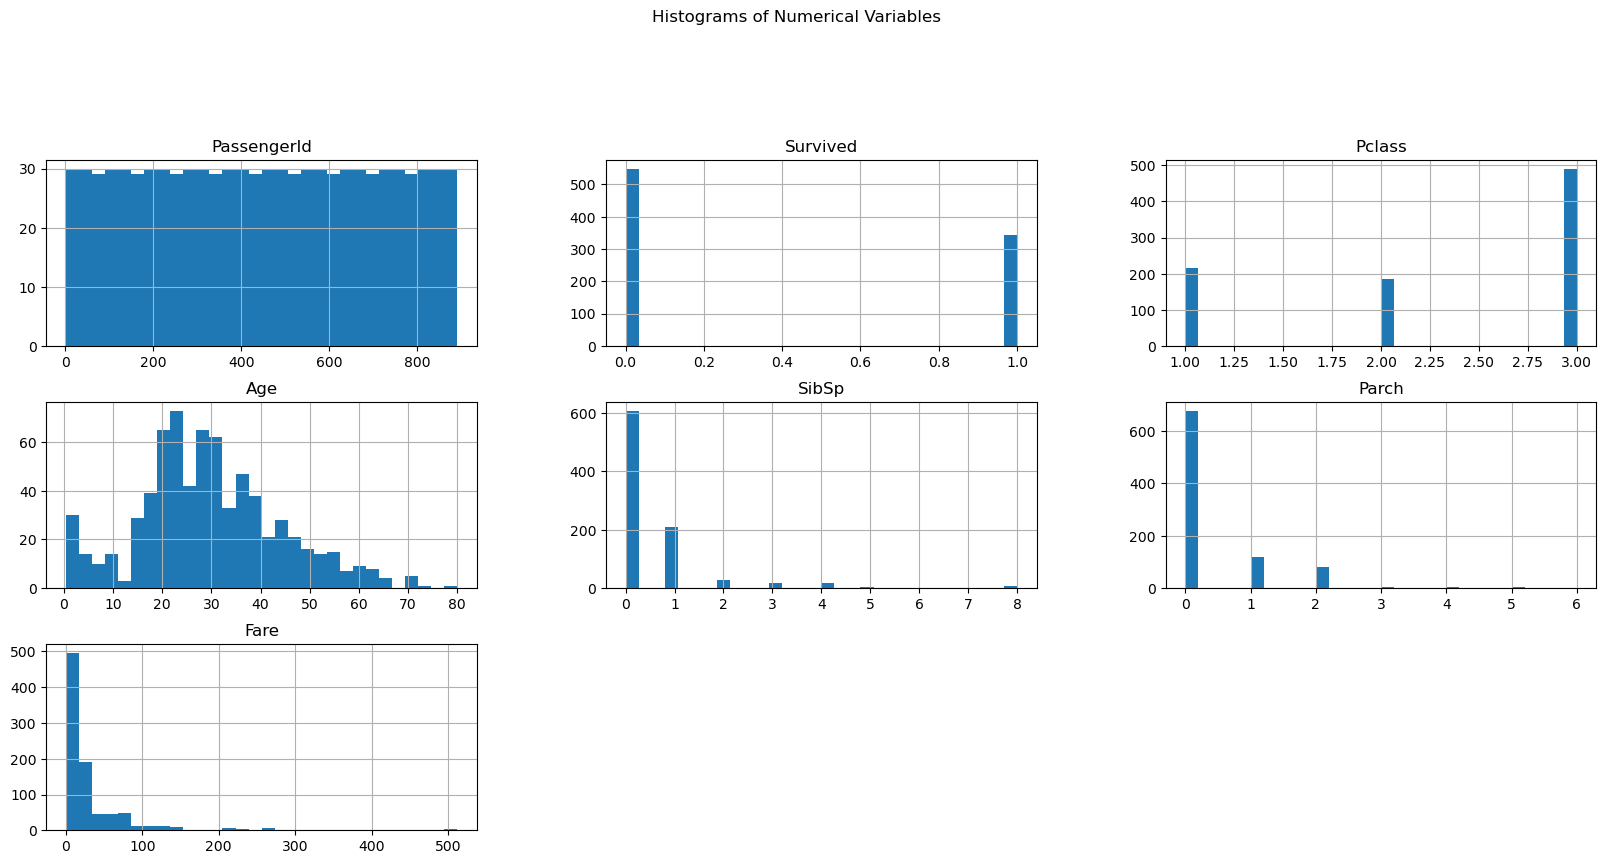

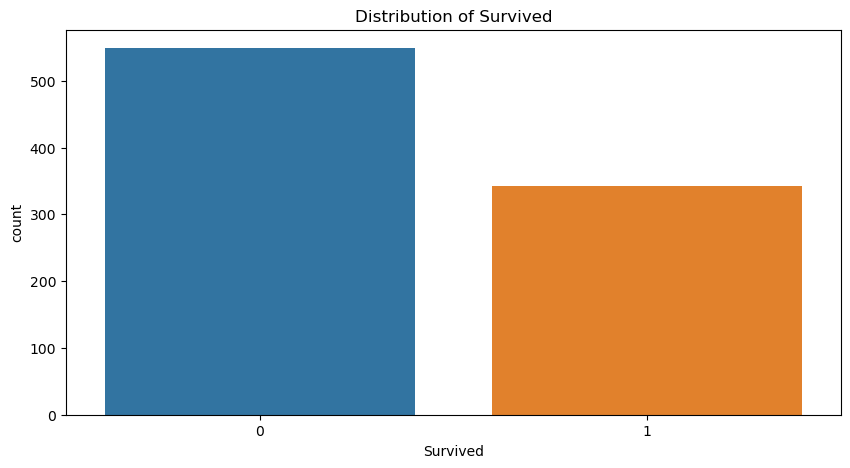

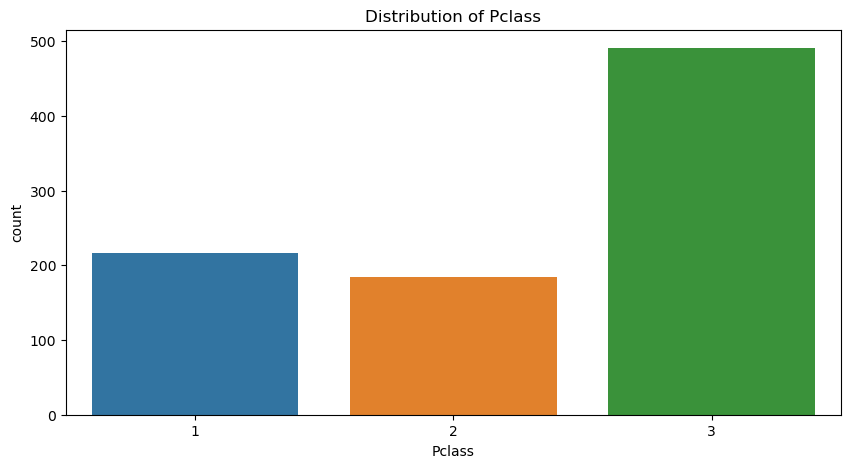

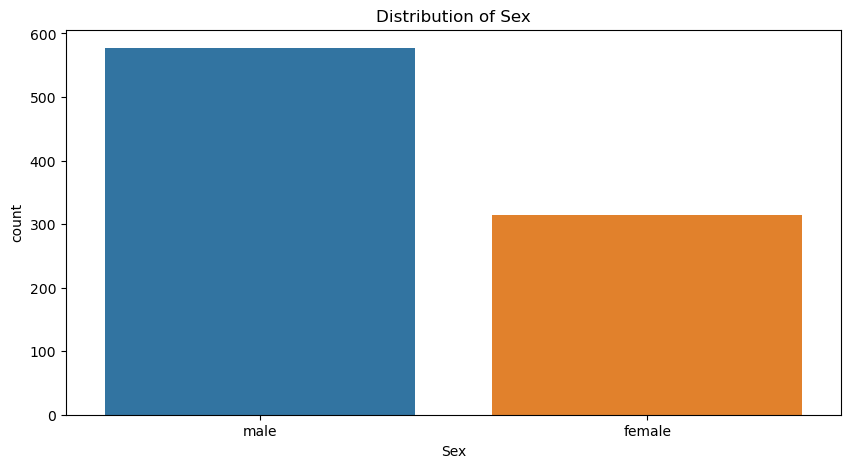

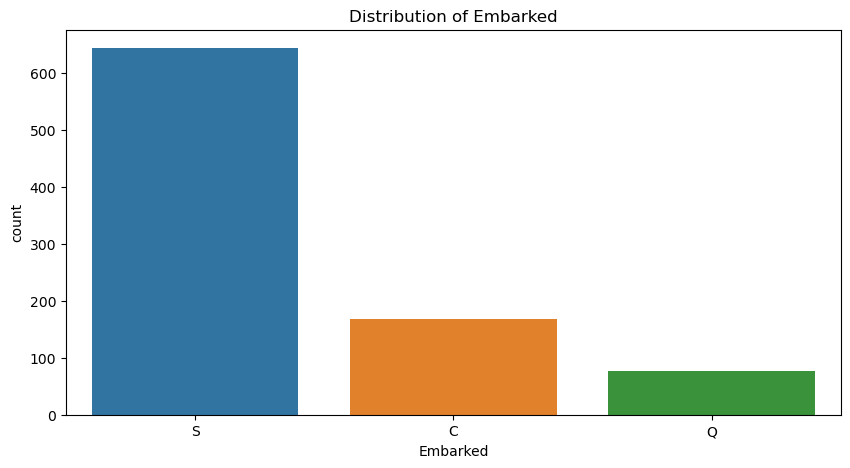

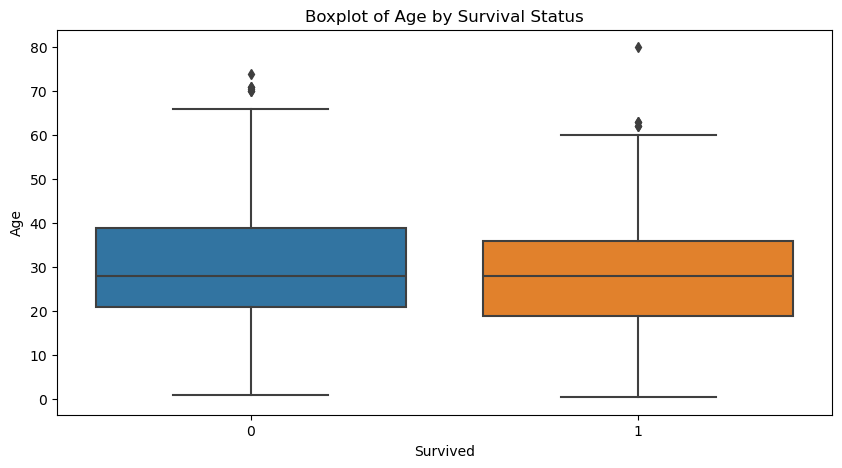

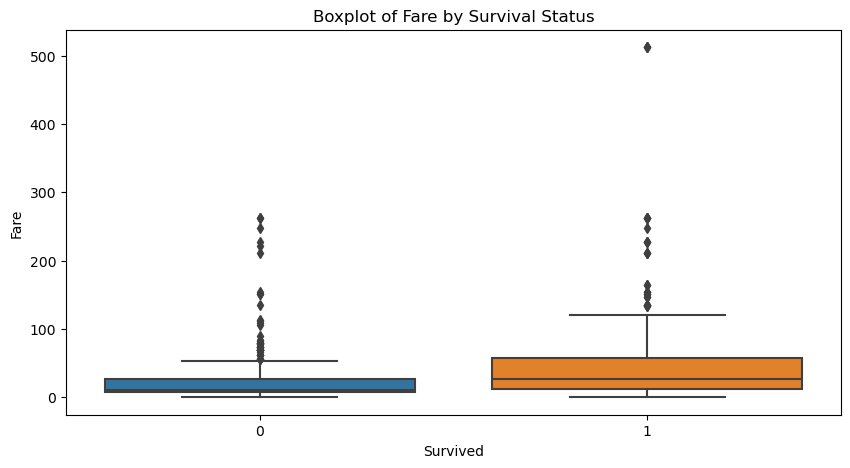

In [9]:
# Plot the variable distributions using histograms, bar plots, or boxplots
plt.figure(figsize=(20, 15))

# Histograms for numerical variables
train_df.hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Bar plots for categorical variables
categorical_vars = ['Survived', 'Pclass', 'Sex', 'Embarked']
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=var)
    plt.title(f'Distribution of {var}')
    plt.show()

# Boxplots for numerical variables by survival status
numerical_vars = ['Age', 'Fare']
for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x='Survived', y=var)
    plt.title(f'Boxplot of {var} by Survival Status')
    plt.show()


## Data Transformation

In [10]:
# Print the features (column names) of the dataset
features = train_df.columns.tolist()
print("Features in the dataset:")
for feature in features:
    print(feature)

Features in the dataset:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


## Variable Descriptions and Usefulness:

PassengerId: A unique identifier for each passenger in the dataset.
Usefulness: Primarily used as an index and has no predictive value for modeling purposes.

                                                                  
Survived: Indicates whether the passenger survived (1) or did not survive (0).
Usefulness: This is the target variable in classification models for predicting survival outcomes.

Pclass (Passenger Class): Denotes the class of the passenger's ticket (1st, 2nd, or 3rd class).
Usefulness: Highly useful, as it reflects the socioeconomic status, which can impact the likelihood of survival. First-class passengers were more likely to have better access to lifeboats.

Name: The full name of the passenger.
Usefulness: Limited direct predictive value, but can be parsed to extract titles (e.g., Mr., Mrs., Miss), which may provide insights into age, gender, and social status.

Sex: The gender of the passenger (male or female).
Usefulness: Highly significant, as women and children were more likely to survive due to evacuation protocols ("women and children first").
Age

Description: The age of the passenger in years.
Usefulness: Very useful, as younger passengers may have had different survival rates compared to adults or the elderly. Missing values need to be handled.
SibSp (Number of Siblings/Spouses Aboard)

Description: The number of siblings or spouses the passenger had aboard the ship.
Usefulness: Can indicate family size and structure, which may have affected survival chances.
Parch (Number of Parents/Children Aboard)

Description: The number of parents or children the passenger had aboard the ship.
Usefulness: Like SibSp, it helps identify family groups and dependency structures.
Ticket

Description: The ticket number for the passenger.
Usefulness: Limited use as a raw feature, but may have insights when analyzed for shared ticket numbers among groups or classes.
Fare

Description: The amount the passenger paid for the ticket.
Usefulness: Indicates the economic status of the passenger. Higher fares are often associated with first-class tickets, which could impact survival rates.

Cabin: The cabin number where the passenger stayed.
Usefulness: Can be useful when parsed into sections (e.g., cabin letter) to identify if certain sections of the ship were safer. Many missing values need consideration.

Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
Usefulness: Could reflect cultural or regional differences in the passengers, potentially affecting survival due to group behavior.

Comments on Usefulness:
Critical Features: Pclass, Sex, Age, Fare, and Embarked are often strong predictors of survival based on historical data and known survival patterns from the Titanic tragedy.
Potential Derived Features: Extracting titles from Name, grouping Age into categories, and parsing Cabin into sections could enhance model performance.
Target Variable: The Survived column is the target variable that the model will predict.
Each feature can contribute uniquely to the model's predictive power, though some features (e.g., PassengerId, Name, Ticket) may need preprocessing or feature engineering to be useful

## Handling Missing Values

In [11]:
# Only the Cabin Field)
train_df_Cabin = train_df[['Cabin']]

# drop the country field
train_df_values = train_df.drop(columns=['Cabin'])
train_df_values.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
# Fill missing ages with the mean age
train_df_values['Age'].fillna(train_df_values['Age'].mean(), inplace=True)

# Drop rows with missing values in 'Embarked' and 'Fare' columns
train_df_values.dropna(subset=['Embarked'], inplace=True)

# Number of columns left after handling missing variables
num_columns_after_handling_missing = train_df_values.shape[1]

print(f"Number of columns after handling missing values: {num_columns_after_handling_missing}")
print(f"Did we drop any columns? {'Yes' if num_columns_after_handling_missing < len(train_df.columns) else 'No'}")


Number of columns after handling missing values: 11
Did we drop any columns? Yes


In [13]:
# How many passengers survived? (If 'Survived' column exists)
if 'Survived' in train_df.columns:
    num_survived = train_df['Survived'].sum()
    print(f"Number of passengers who survived: {num_survived}")

Number of passengers who survived: 342


In [14]:
train_df_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [15]:

# Identify categorical variables suitable for one-hot encoding
categorical_vars = ['Sex', 'Embarked']

print("Categorical variables before One-Hot Encoding:")
train_df_values[categorical_vars].head()

Categorical variables before One-Hot Encoding:


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [16]:
# Convert the categorical variables into one-hot encodings
df_encoded = pd.get_dummies(train_df_values, columns=categorical_vars)


print("\nCategorical variables after One-Hot Encoding:")
df_encoded.head()



Categorical variables after One-Hot Encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [17]:
# Convert the Name column to numerical values using label encoding
df_encoded['Name'] = df_encoded['Name'].astype('category').cat.codes

# Convert the Ticket column to numerical values using label encoding
df_encoded['Ticket'] = df_encoded['Ticket'].astype('category').cat.codes

In [18]:
# Define features and target variable
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

In [19]:
X

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,108,22.000000,1,0,522,7.2500,False,True,False,False,True
1,2,1,190,38.000000,1,0,595,71.2833,True,False,True,False,False
2,3,3,353,26.000000,0,0,668,7.9250,True,False,False,False,True
3,4,1,272,35.000000,1,0,48,53.1000,True,False,False,False,True
4,5,3,15,35.000000,0,0,471,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,547,27.000000,0,0,100,13.0000,False,True,False,False,True
887,888,1,303,19.000000,0,0,14,30.0000,True,False,False,False,True
888,889,3,412,29.699118,1,2,674,23.4500,True,False,False,False,True
889,890,1,81,26.000000,0,0,8,30.0000,False,True,True,False,False


## Data Splitting

In [20]:
# Shuffle the dataset and split it into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (711, 13)
Shape of X_test: (178, 13)
Shape of y_train: (711,)
Shape of y_test: (178,)


## Decision Tree Modeling

In [21]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [22]:
# Fit the model on the training set
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
# Score your tree
score = clf.score(X_test, y_test)
print(f"Score of the decision tree: {score}")

Score of the decision tree: 0.7921348314606742


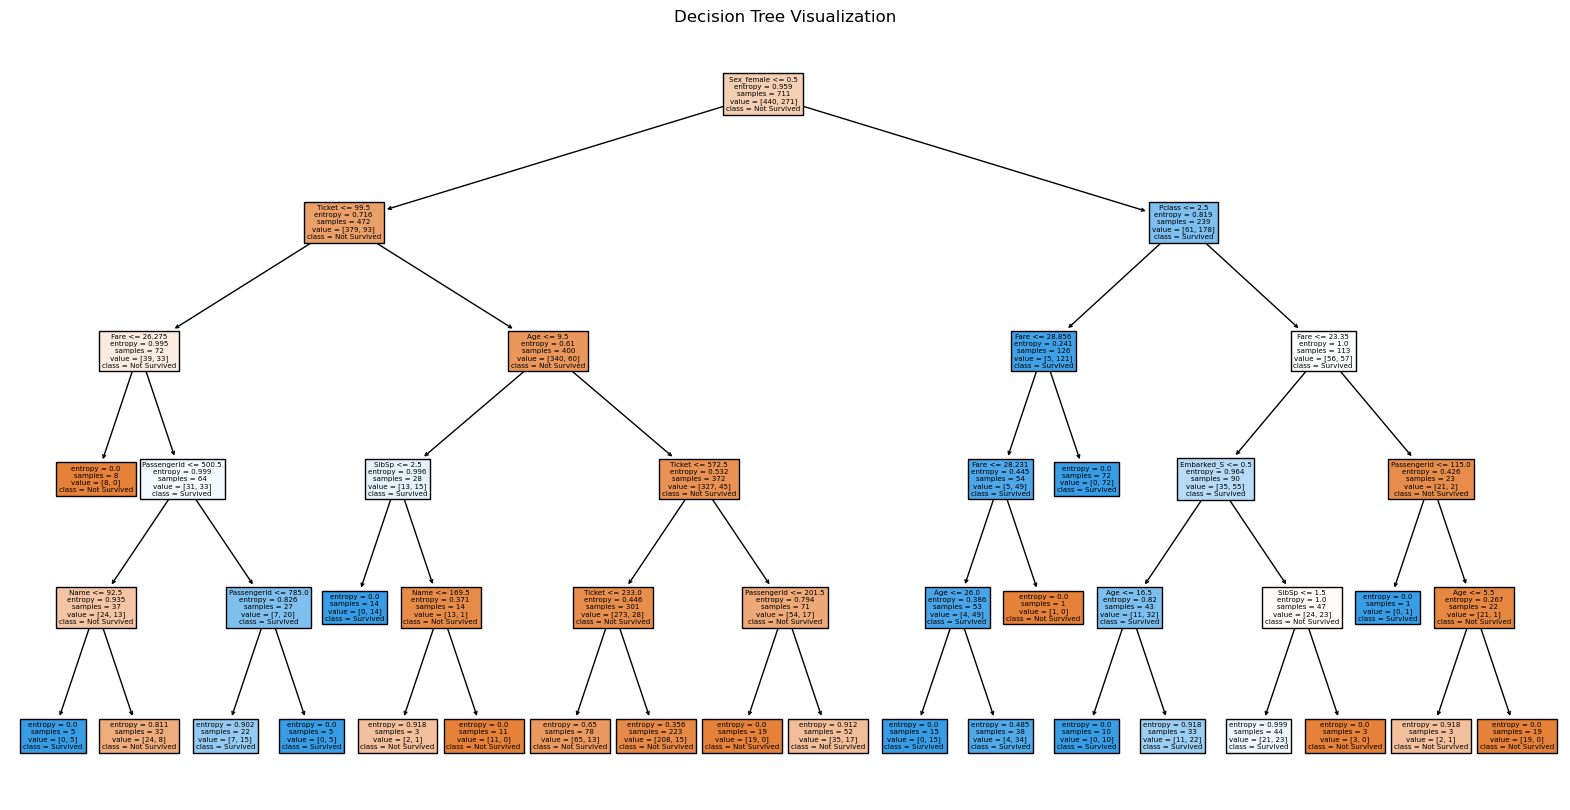

In [24]:
# Display visualization of the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
# The top two level splitting features?
top_two_features = [X.columns[i] for i in clf.tree_.feature[:2]]
print(f"Top two level splitting features: {top_two_features}")

Top two level splitting features: ['Sex_female', 'Ticket']


In [26]:
# Gini is appropriate here as well? Why?
gini_appropriate = "Yes"
gini_reason = "Gini impurity is another criterion for measuring the quality of a split. It is appropriate here as it also measures the impurity of a node and can be used to build decision trees."
print(f"Would Gini be appropriate here as well? {gini_appropriate}")
print(f"Reason: {gini_reason}")

Would Gini be appropriate here as well? Yes
Reason: Gini impurity is another criterion for measuring the quality of a split. It is appropriate here as it also measures the impurity of a node and can be used to build decision trees.


## Model Evaluation using Cross Vidation

In [27]:
#  Evaluate the model's performance using 3-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Calculate mean accuracy and variance
mean_accuracy = cv_scores.mean()
variance = cv_scores.std()

print(f"Accuracy: {mean_accuracy:.2f} (+/- {variance:.2f})")

# Is accuracy an appropriate metric? Why?
accuracy_appropriate = "Accuracy is an appropriate metric when the classes are balanced. However, if the classes are imbalanced (e.g., one class is much more frequent than the other), other metrics like precision, recall, or F1-score might be more informative."
print(f"Is accuracy an appropriate metric? {accuracy_appropriate}")


Accuracy: 0.76 (+/- 0.08)
Is accuracy an appropriate metric? Accuracy is an appropriate metric when the classes are balanced. However, if the classes are imbalanced (e.g., one class is much more frequent than the other), other metrics like precision, recall, or F1-score might be more informative.


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for fine-tuning
param_grid = {
    'criterion': ['gini', 'entropy'],        # Try both 'gini' and 'entropy'
    'max_depth': [None, 5, 10, 15],          # Different depths to test
    'min_samples_split': [2, 5, 10],         # Varying min samples for splitting nodes
    'min_samples_leaf': [1, 2, 5],           # Minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2']   # Test different feature subsets
}

# Initialize the base Decision Tree Classifier with random_state for reproducibility
clf = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=2   # Print progress during tuning
)

# Fit the model to your training data (replace X_train and y_train with your actual data)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.81


In [29]:
# Test the decision tree classifier with different max depths ranging from 1 to 20 using 5-fold cross-validation
for depth in range(1, 21):
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    scores_entropy = cross_val_score(clf_entropy, X, y, cv=5)
    
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    scores_gini = cross_val_score(clf_gini, X, y, cv=5)
    
    print("Entropy - Max depth:%d, Accuracy: %0.3f (+/- %0.3f)" % (depth, scores_entropy.mean(), scores_entropy.std() * 2))
    print("Gini - Max depth:%d, Accuracy: %0.3f (+/- %0.3f)" % (depth, scores_gini.mean(), scores_gini.std() * 2))

Entropy - Max depth:1, Accuracy: 0.786 (+/- 0.037)
Gini - Max depth:1, Accuracy: 0.786 (+/- 0.037)
Entropy - Max depth:2, Accuracy: 0.773 (+/- 0.038)
Gini - Max depth:2, Accuracy: 0.773 (+/- 0.038)
Entropy - Max depth:3, Accuracy: 0.768 (+/- 0.140)
Gini - Max depth:3, Accuracy: 0.756 (+/- 0.132)
Entropy - Max depth:4, Accuracy: 0.765 (+/- 0.173)
Gini - Max depth:4, Accuracy: 0.764 (+/- 0.171)
Entropy - Max depth:5, Accuracy: 0.759 (+/- 0.182)
Gini - Max depth:5, Accuracy: 0.765 (+/- 0.142)
Entropy - Max depth:6, Accuracy: 0.758 (+/- 0.171)
Gini - Max depth:6, Accuracy: 0.759 (+/- 0.161)
Entropy - Max depth:7, Accuracy: 0.790 (+/- 0.100)
Gini - Max depth:7, Accuracy: 0.773 (+/- 0.138)
Entropy - Max depth:8, Accuracy: 0.772 (+/- 0.170)
Gini - Max depth:8, Accuracy: 0.769 (+/- 0.154)
Entropy - Max depth:9, Accuracy: 0.781 (+/- 0.131)
Gini - Max depth:9, Accuracy: 0.769 (+/- 0.125)
Entropy - Max depth:10, Accuracy: 0.766 (+/- 0.140)
Gini - Max depth:10, Accuracy: 0.760 (+/- 0.145)
Entropy 

In [30]:
# Fit the model with the Entropy criterion and max_depth of 9 to check top splitting features
clf_entropy_best = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
clf_entropy_best.fit(X, y)

# Get the top two splitting features for the model
top_two_features_entropy = [X.columns[i] for i in clf_entropy_best.tree_.feature[:2] if i != -2]  # Exclude -2 (unused node)

# Display the top two features
if top_two_features_entropy:
    print(f"Top two splitting features with 'Entropy' criterion: {top_two_features_entropy}")
else:
    print("No splitting features found at the top two levels.")


Top two splitting features with 'Entropy' criterion: ['Sex_female', 'Ticket']


## Entropy and Gini

In [31]:
def calculate_entropy(dataset):
    # Count the frequency of each class in the dataset
    class_counts = Counter(dataset)
    total_count = len(dataset)
    
    # Calculate the entropy
    entropy = 0
    for count in class_counts.values():
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

# Test cases
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

# Calculate and print the entropy for each test case
for i, test_case in enumerate(test_cases):
    entropy = calculate_entropy(test_case)
    print(f"Test Case {i+1}: {test_case} -> Entropy: {entropy:.4f}")


Test Case 1: [1, 2, 2, 3, 3, 3] -> Entropy: 1.4591
Test Case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Entropy: 0.0000
Test Case 3: [2, 3] -> Entropy: 1.0000


In [32]:
# Function to calculate entropy
def calculate_entropy(dataset):
    # Count the frequency of each class in the dataset
    class_counts = Counter(dataset)
    total_count = len(dataset)
    
    # Calculate the entropy
    entropy = 0
    for count in class_counts.values():
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

# Function to calculate Gini impurity
def calculate_gini(dataset):
    # Count the frequency of each class in the dataset
    class_counts = Counter(dataset)
    total_count = len(dataset)
    
    # Calculate the Gini impurity
    gini = 1
    for count in class_counts.values():
        probability = count / total_count
        gini -= probability ** 2
    
    return gini

# Test cases
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

# Calculate and print the entropy and Gini impurity for each test case
for i, test_case in enumerate(test_cases):
    entropy = calculate_entropy(test_case)
    gini = calculate_gini(test_case)
    print(f"Test Case {i+1}: {test_case} -> Entropy: {entropy:.4f}, Gini: {gini:.4f}")


Test Case 1: [1, 2, 2, 3, 3, 3] -> Entropy: 1.4591, Gini: 0.6111
Test Case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Entropy: 0.0000, Gini: 0.0000
Test Case 3: [2, 3] -> Entropy: 1.0000, Gini: 0.5000


## Explanation

- Entropy Calculation: The entropy is calculated by summing the negative product of the probability of each class and the logarithm base 2 of that probability.
  
- Gini Calculation: The Gini impurity is calculated by subtracting the sum of the squared probabilities of each class from 1.

## Survived Predictions

In [33]:
# Load Test Data
test_df = pd.read_csv('test.csv')


In [34]:
# Number of rows in the Dataset
test_num_rows = test_df.shape[0]

test_num_rows

418

In [35]:
# Number of columns in the Dataset
test_df_num_columns = len(test_df.columns)

test_df_num_columns

11

In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Handling Test Data Preprocessing

In [37]:
# Drop Column Cabin
test_df.drop(columns='Cabin', inplace=True)

In [38]:
# Fill missing ages with the mean age
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

# Number of columns left after handling missing variables
num_columns_after_handling_missing = test_df.shape[1]

print(f"Number of columns after handling missing values: {num_columns_after_handling_missing}")


Number of columns after handling missing values: 10


In [39]:
# Identify categorical variables suitable for one-hot encoding
categorical_vars = ['Sex', 'Embarked']

print("Categorical variables before One-Hot Encoding:")
test_df[categorical_vars].head()

Categorical variables before One-Hot Encoding:


,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [40]:

# Convert the categorical variables into one-hot encodings
test_df_encoded = pd.get_dummies(test_df, columns=categorical_vars)

# Display Categorical Variable after one hot ending
print("\nCategorical variables after One-Hot Encoding:")

test_df_encoded.head()



Categorical variables after One-Hot Encoding:


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True


In [41]:
# Convert the Name column to numerical values using label encoding
test_df_encoded['Name'] = test_df_encoded['Name'].astype('category').cat.codes

# Convert the Ticket column to numerical values using label encoding
test_df_encoded['Ticket'] = test_df_encoded['Ticket'].astype('category').cat.codes

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [43]:
# Prediction Result
predictions = clf_entropy_best.predict(test_df_encoded)
print(predictions)

[0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 0 0]


In [44]:
# Print the Length
print(len(test_df_encoded['PassengerId']), len(predictions))


418 418


In [45]:
# Save result to Dataframe
result = pd.DataFrame(test_df_encoded['PassengerId'])
result['Predictions'] = predictions


In [46]:
# Save Result to csv
result.to_csv('Prediction_Submission_Result.csv', index=False)